### Microlensing metrics

The microlensing metrics have been contributed by members of the TVS science collaboration, and are described in more depth in the [notebook](https://github.com/lsst/rubin_sim_notebooks/blob/main/maf/science/Microlensing%20Metric.ipynb) in the [rubin_sim_notebooks](https://github.com/lsst/rubin_sim_notebooks/) repo. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorcet
from IPython.display import display
import rubin_sim.maf as maf

In [2]:
# Download the information on the families - this helps us load up related sets of simulations,
# while progressing in expected impact through survey simulation variations within each family.
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/runs_v2.1.json'
families = maf.archive.get_family_descriptions()
family_list = families.index.values

In [3]:
# Download the summary csv file -- note that metric names may change between major updates in the CSV file
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2022_04_28.csv'
summaries = maf.get_metric_summaries()

In [4]:
# Load the existing metric definition file -- this is what we'd like to update
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json'
metric_set = maf.get_metric_sets()

In [5]:
# Metrics relating to microlensing specifically 
metric_set.loc[['TVS microlensing', 'TVS microlensing all']]

metric  \
metric set           metric                                                                                                  
TVS microlensing     Total detected MicrolensingMetric_detect tE 20_...  Total detected MicrolensingMetric_detect tE 20...   
                     Total detected MicrolensingMetric_detect tE 200...  Total detected MicrolensingMetric_detect tE 20...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
TVS microlensing all Total detected MicrolensingMetric_detect tE 1_5...  Total detected MicrolensingMetric_detect tE 1_...   
                     Total detected MicrolensingMetric_detect tE 5_1...  Total detected MicrolensingMetric_detect tE 5_...   
                     Total detected MicrolensingMetric_detect tE 10_...  Total detected MicrolensingMetric_detect tE 10...   
                     Total detected MicrolensingMetric_detect tE 20_...  Total detected MicrolensingMetric_detect tE 20...   
                     Total detected MicrolensingMetric_detect tE 30_...  Total detected MicrolensingMetric_detect tE 30...   
                     Total detected MicrolensingMetric_detect tE 60_...  Total detected MicrolensingMetric_detect tE 60...   
                     Total detected MicrolensingMetric_detect tE 100...  Total detected MicrolensingMetric_detect tE 10...   
                     Total detected MicrolensingMetric_detect tE 200...  Total detected MicrolensingMetric_detect tE 20...   
                     Total detected MicrolensingMetric_detect tE 500...  Total detected MicrolensingMetric_detect tE 50...   
                     Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
                     Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
                     Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
                     Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
                     Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
                     Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
                     Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
                     Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
                     Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
                     Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/

We can plot these with MAF tools, visualizing subsets of the runs. We'll use `maf.plot_run_metric_mesh` for the big set of metrics, and `maf.plot_run_metric` for the smaller subset of 20-30 and 200-500 day metrics. 

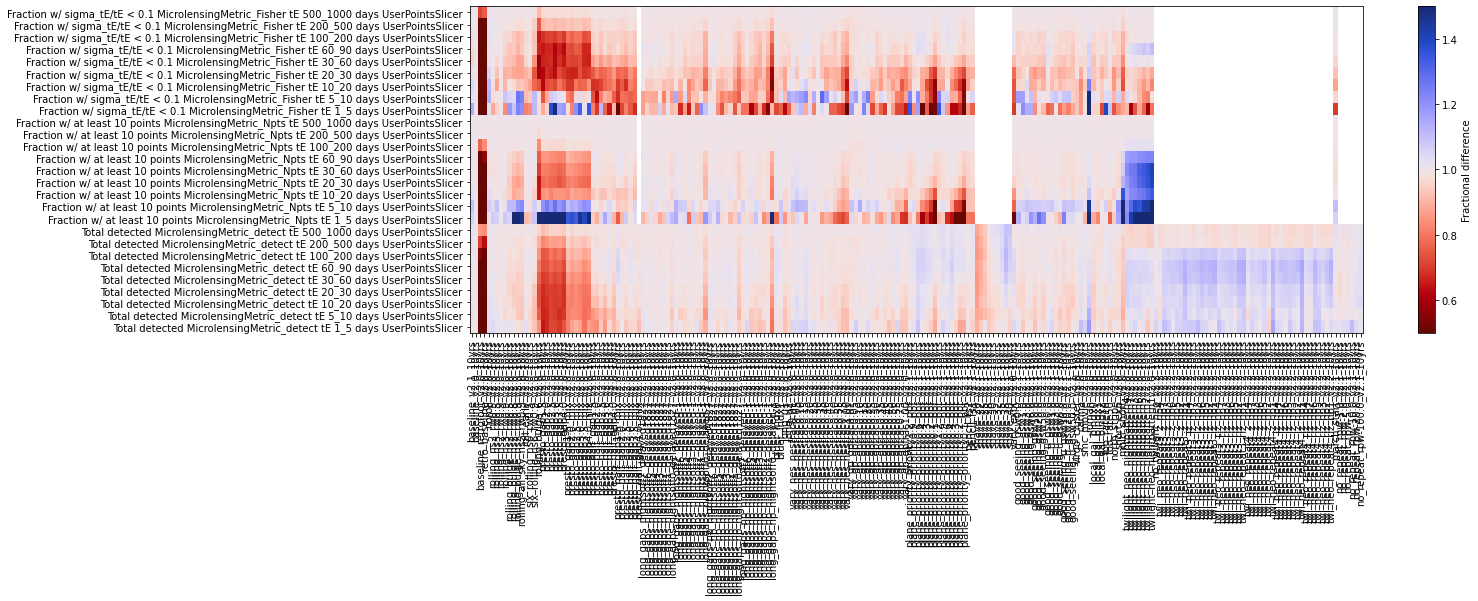

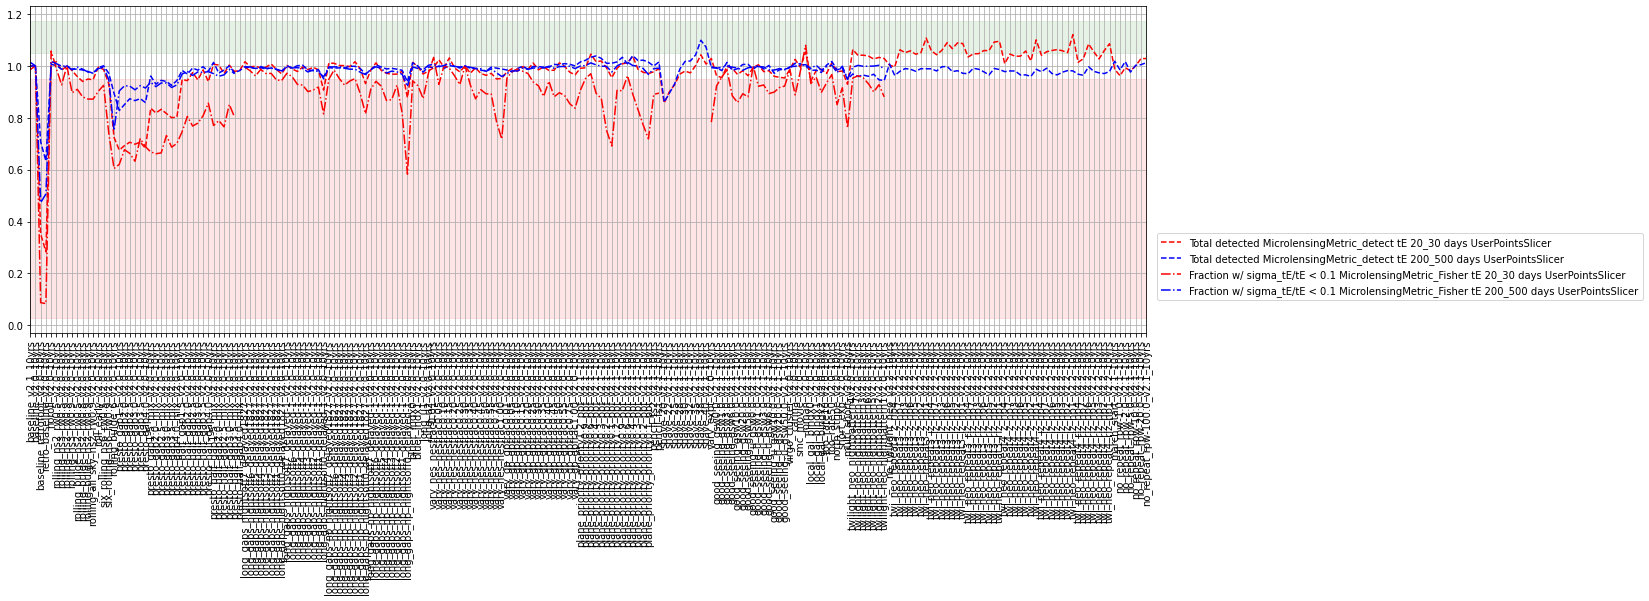

In [6]:
# Check all runs except DDF variations
fams = [f for f in family_list if not f.startswith('ddf')]
these_runs = families.explode('run').loc[fams]['run']
baseline_run = 'baseline_v2.0_10yrs'

mall = metric_set.loc['TVS microlensing all']
msub = metric_set.loc['TVS microlensing']

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mall['metric']], 
                              baseline_run=baseline_run,
                              metric_set=mall)
fig.set_figwidth(20)


fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(20)
ax.legend(loc=(1.01, 0.1))


The fisher values weren't calculated for all runs - and we found that there was a bug in reporting the Npts (at the time of the CSV file creation, the SNR was not being accounted for in the Npts value -- we've fixed it, but will wait to rerun the metrics for now). 

But basically, this points out a few areas of interest (which may have already been obvious). 
The footprint - so the new vs. old baseline, plus vary nes, vary gp, and galactic plane footprint families. 

The intra-night cadence - so the triplets and long gaps no pairs families. 

And then some of the microsurveys -- although primarily, the impacts here relate to losing time in the remainder of the survey. 

(0.6, 1.1)

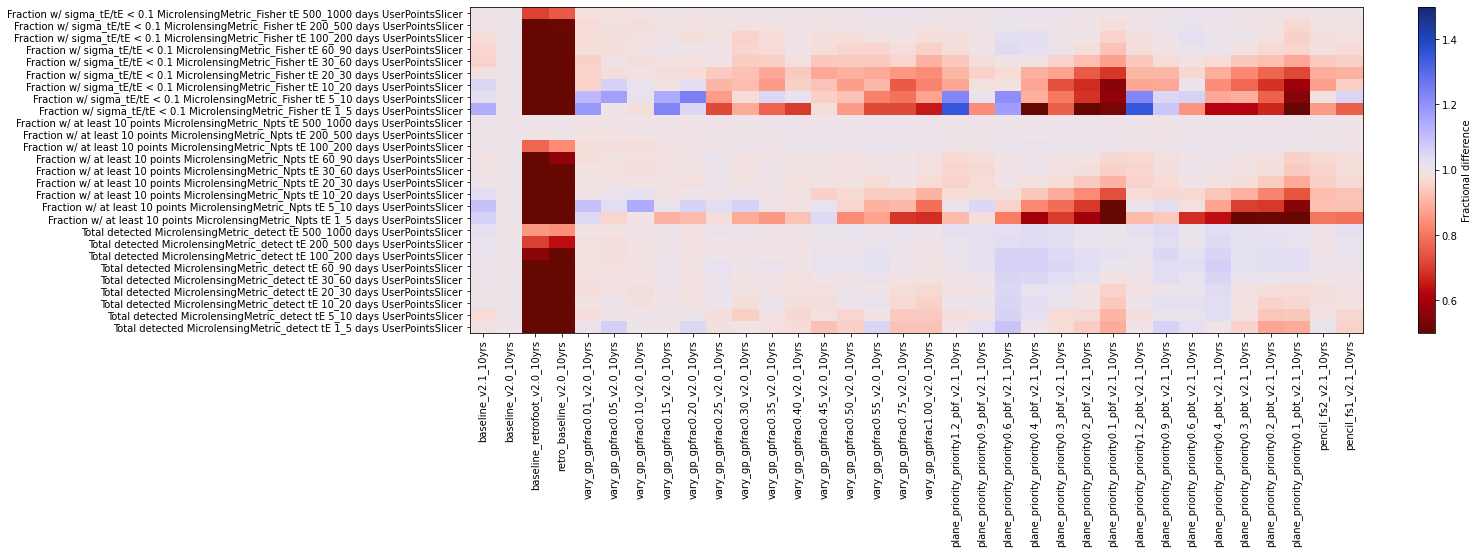

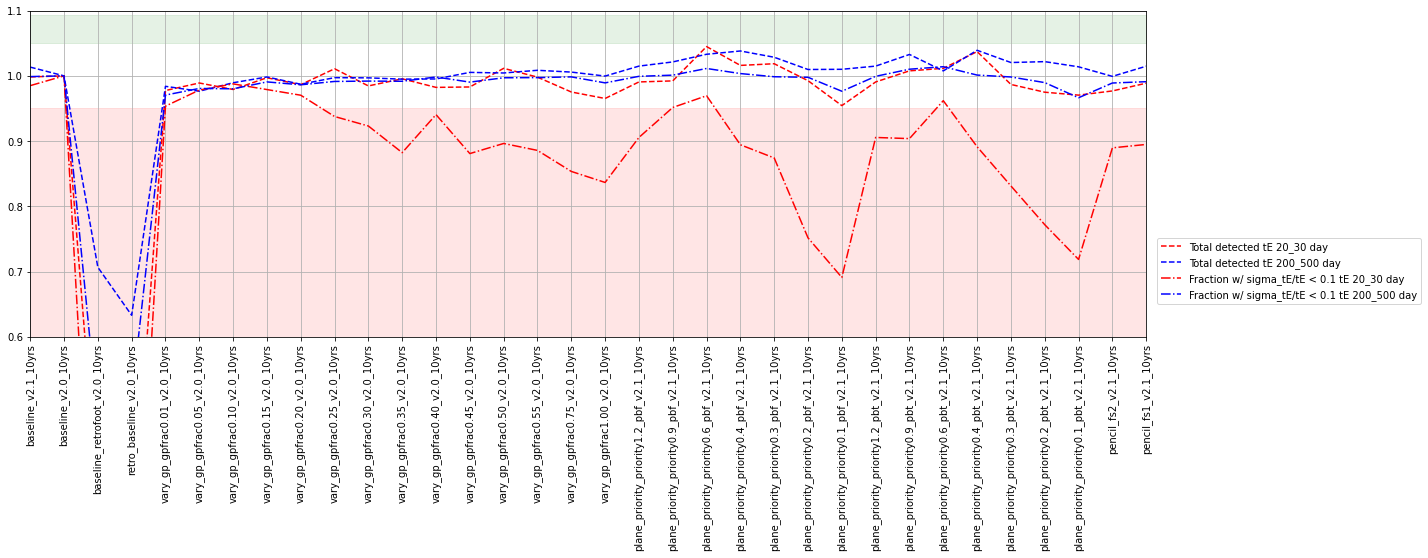

In [7]:
# FOOTPRINT
fams = ['baseline', 'vary gp', 'galactic plane footprint']
these_runs = families.explode('run').loc[fams]['run']

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mall['metric']], 
                              baseline_run=baseline_run,
                              metric_set=mall)
fig.set_figwidth(20)


fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                              metric_label_map=msub['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(20)
ax.legend(loc=(1.01, 0.1))
ax.set_ylim(0.6, 1.1)

This confirms that the move to the v2.0 footprint was good! It adds a lot of coverage near the galactic bulge, at WFD levels, but maintains a good number of visits per pointing in these WFD fields.

The total number of detections stays fairly constant across all of these variations in the footprint (these are the two dashed lines in the bottom plot, and they stay in the +/-5% area). 
The fraction of detections with sigma tE/tE < 0.1 does vary for the 20-30 day timescale objects. It's even more variable for the shorter timescale lenses, which may be interesting to look at in terms understanding where the science priority lies. 

All of these simulations held the 'diamond' region near the galactic bulge at equivalent levels to the low-dust WFD, so the variations in the footprint are spending more time in the dusty galactic plane outside this central region. The `vary_gp` simulations add these visits evenly throughout the dusty plane, while the `plane_priority` simulations add visits in parts of the sky targeted by the galplane priority map. 

We see that the fraction of detections with $\sigma$tE / tE < 0.1. for the 20-30 day timescale objects decreases as more time is spent within the dusty-plane region as a whole (the vary_gp family). 

When time is added in targeted ways to the galactic plane region, the metric can improve slightly -- but as more time is added in these regions, the fraction can fall by up to 30%. 

We can look at these metrics again, and add in the number of visits per pointing in the area that receives >750 visits per pointing (generally equivalent to what is considered 'WFD' but note that this expands to include more of the plane, as the plane area approaches WFD-level weighting!). 

(0.5, 1.5)

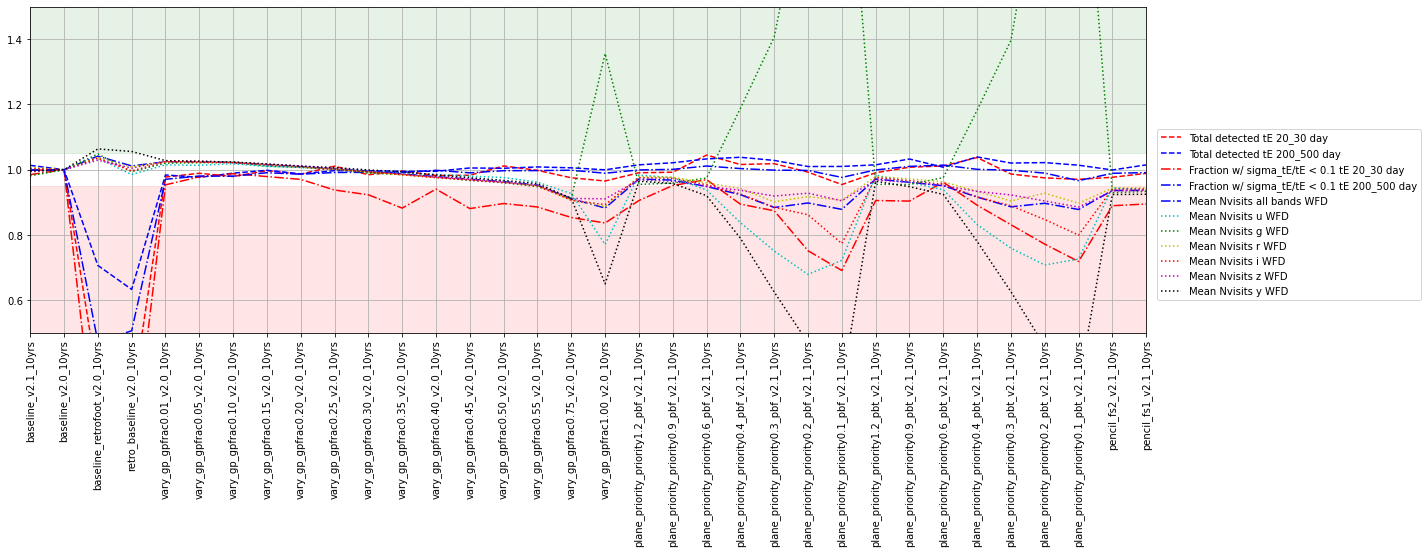

In [8]:
msub2 = pd.concat([msub, metric_set.loc['N Visits'].query("metric.str.contains('Mean NVisits')")])
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub2['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub2,
                              metric_label_map=msub2['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(20)
ax.legend(loc=(1.01, 0.1))
ax.set_ylim(0.5, 1.5)

It's notable how the number of visits per pointing changes in a filter-dependent way -- g band is more heavily weighted in the galactic plane priority maps than in the low-dust WFD, so as more parts of the plane are observed at WFD-equivalent-levels, the mean values per filter change). 
But in general, as more time is added to the galactic plane region outside the WFD diamond, the number of visits per pointing in the WFD-equivalent-area drops (which makes sense - the same overall number of visits are being distributed across more area). This seems likely to be what is driving the drop in the fraction of lenses detected with $\sigma$tE / tE < 0.1. 


(0.6, 1.1)

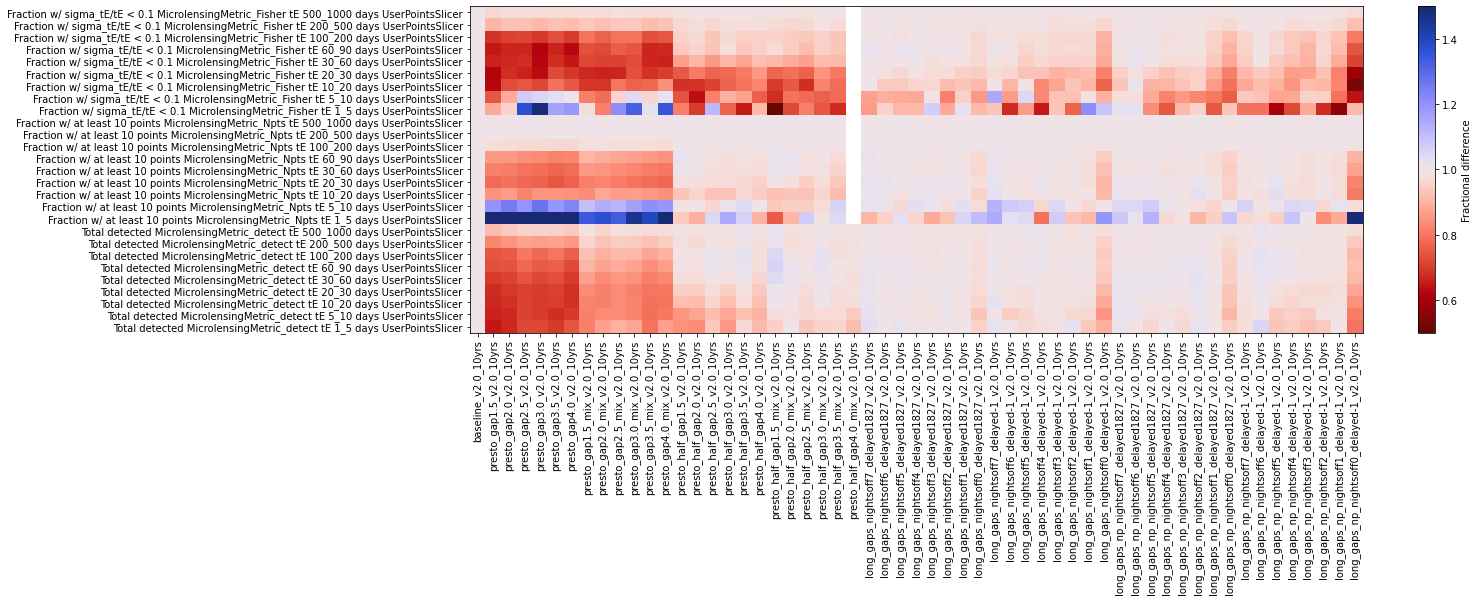

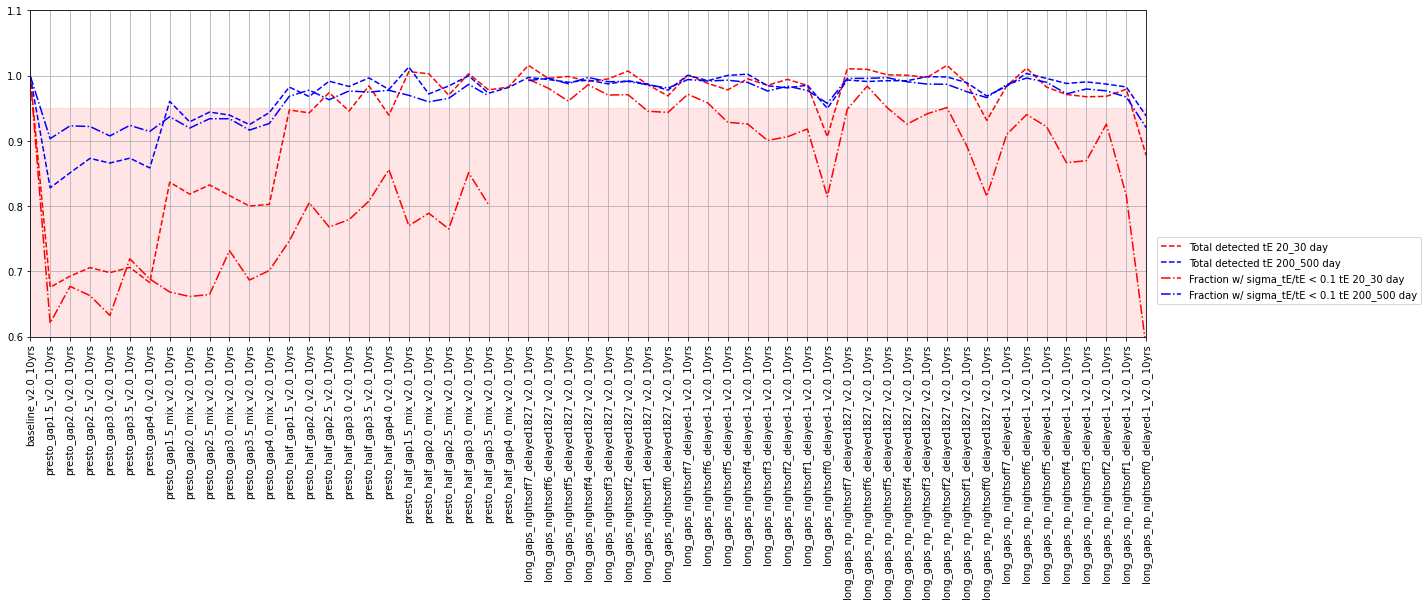

In [9]:
# Intranight cadence
fams = ['triplets', 'long gaps no pairs']
these_runs = np.concatenate([[baseline_run], families.explode('run').loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mall['metric']], 
                              baseline_run=baseline_run,
                              metric_set=mall)
fig.set_figwidth(20)


fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                              metric_label_map=msub['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(20)
ax.legend(loc=(1.01, 0.1))
ax.set_ylim(0.6, 1.1)

Generally, these metrics argue against consolidating visits into triplets, or even adding long gaps between visits (in the long_gaps_np* simulations). 
Most likely, the addition of a third visit to measure the change of magnitude within a night, is a timescale that is too short for these particular metrics. The very short timescale lensing events do find an improved fisher metric value when the gap before the triplet is on the order of 3-4 hours. 

Adding a triplet for the first pair of the night, at an interval of 4-7 hours, doesn't seem particularly impactful as long as this is only triggered half of the nights or less often (long_gaps_nightsoff[4 or more]). 

(0.6, 1.1)

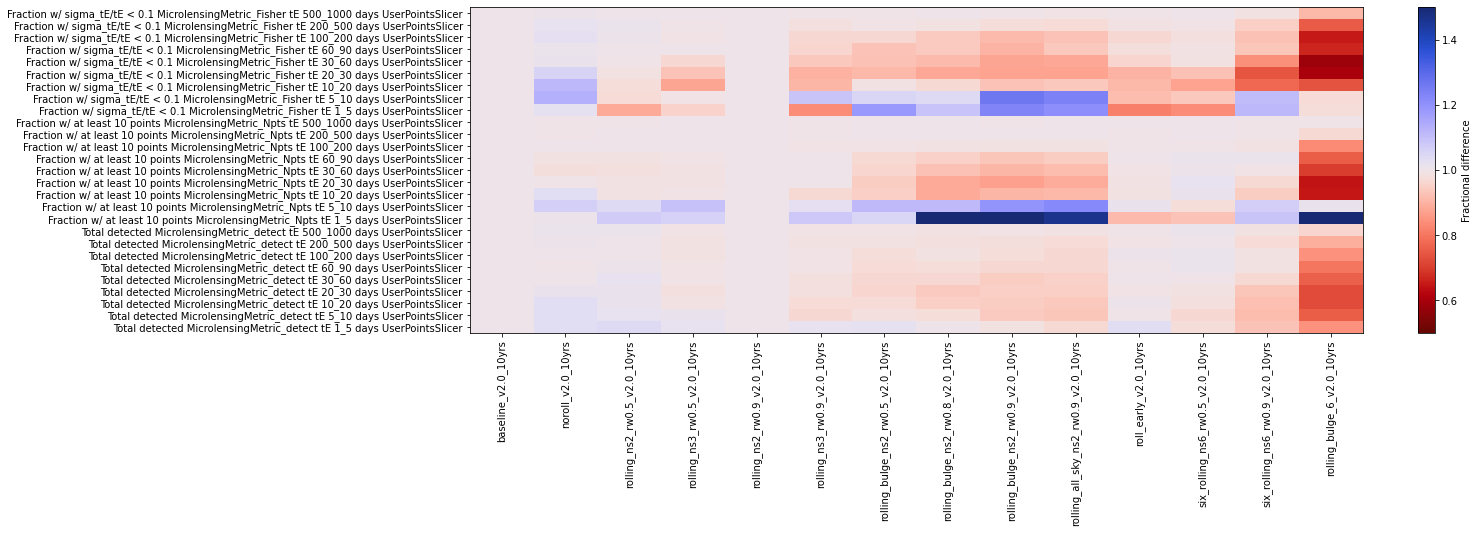

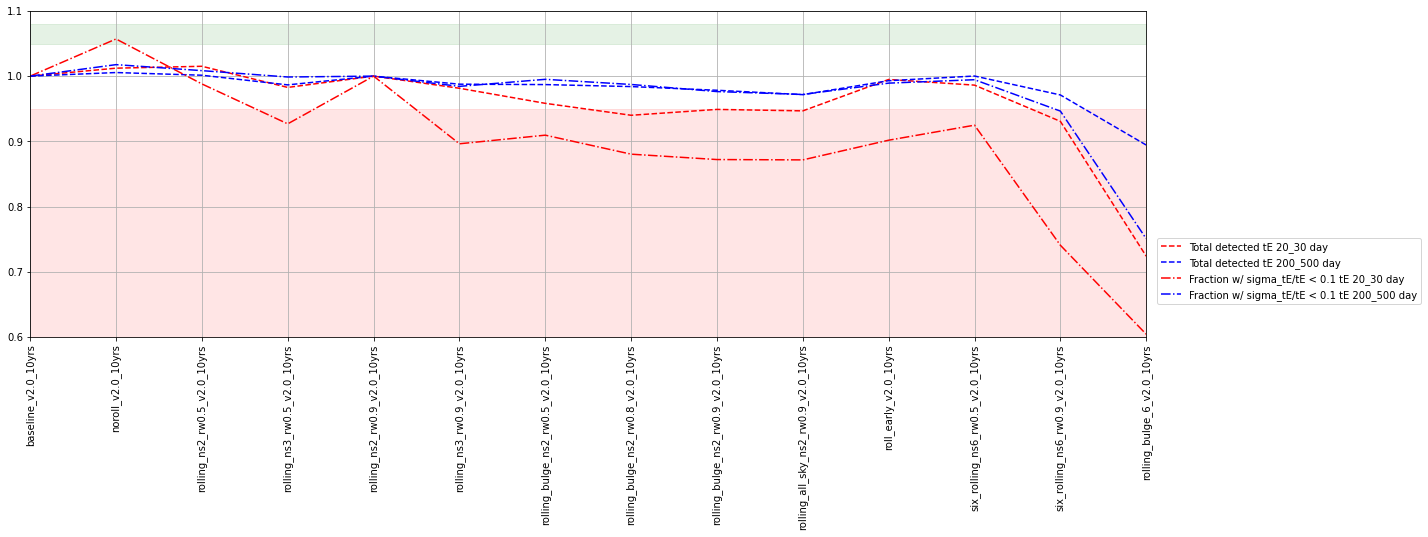

In [10]:
# rolling cadence
fams = ['rolling']
these_runs = np.concatenate([[baseline_run], families.explode('run').loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mall['metric']], 
                              baseline_run=baseline_run,
                              metric_set=mall)
fig.set_figwidth(20)


fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                              metric_label_map=msub['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(20)
ax.legend(loc=(1.01, 0.1))
ax.set_ylim(0.6, 1.1)

These metrics are not generally in favor of rolling cadence, but also most rolling cadences aren't particularly bad - except for the 6-band rolling cadence in the bulges (rolling_bulge_6). 

(0.6, 1.1)

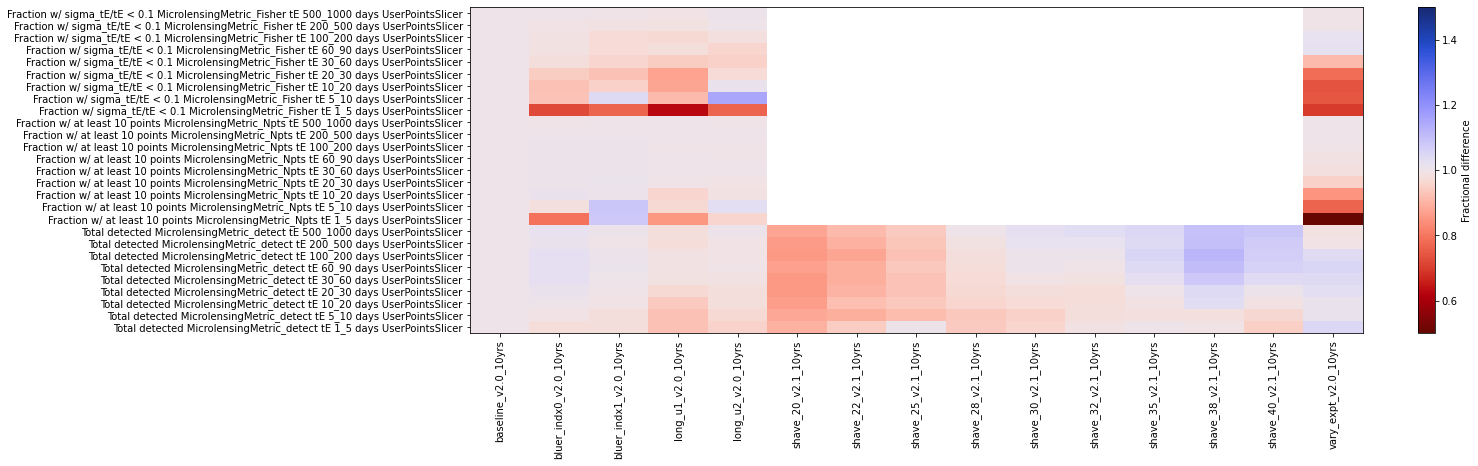

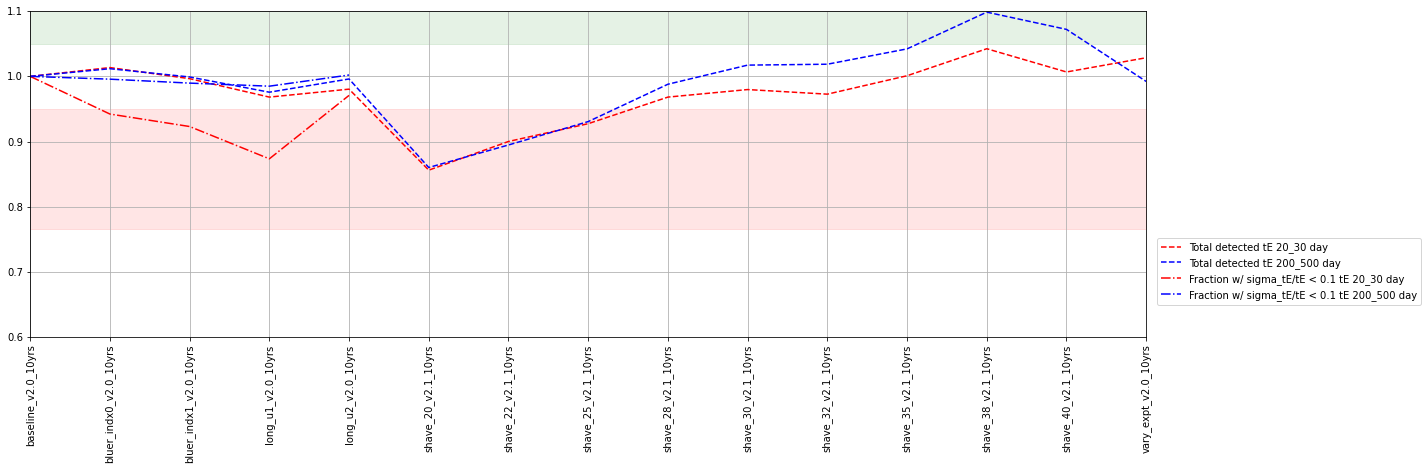

In [11]:
fams = ['bluer balance', 'longer u visits', 'vary expt']
these_runs = np.concatenate([[baseline_run], families.explode('run').loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mall['metric']], 
                              baseline_run=baseline_run,
                              metric_set=mall)
fig.set_figwidth(20)


fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                              metric_label_map=msub['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(20)
ax.legend(loc=(1.01, 0.1))
ax.set_ylim(0.6, 1.1)

Not all the metrics are available for all of these runs (the runs varying the exposure time in particular), but it looks like shorter exposure times do worse than longer exposure times. 
In general, changing the filter balance towards bluer visits is slightly negative. 

(0.6, 1.1)

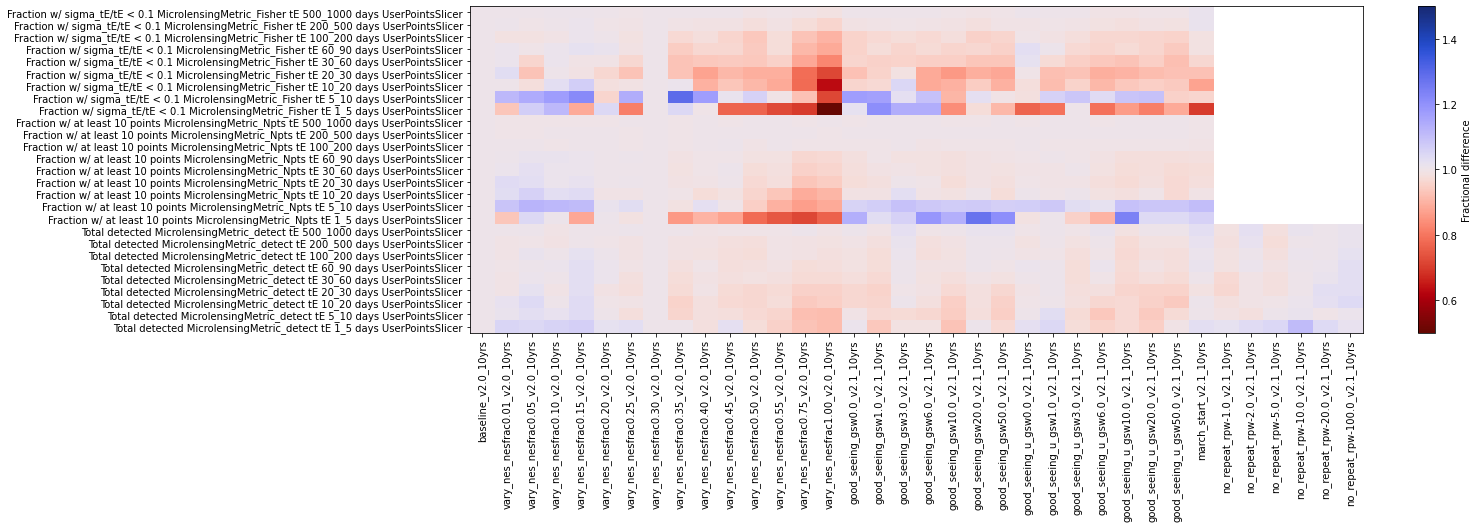

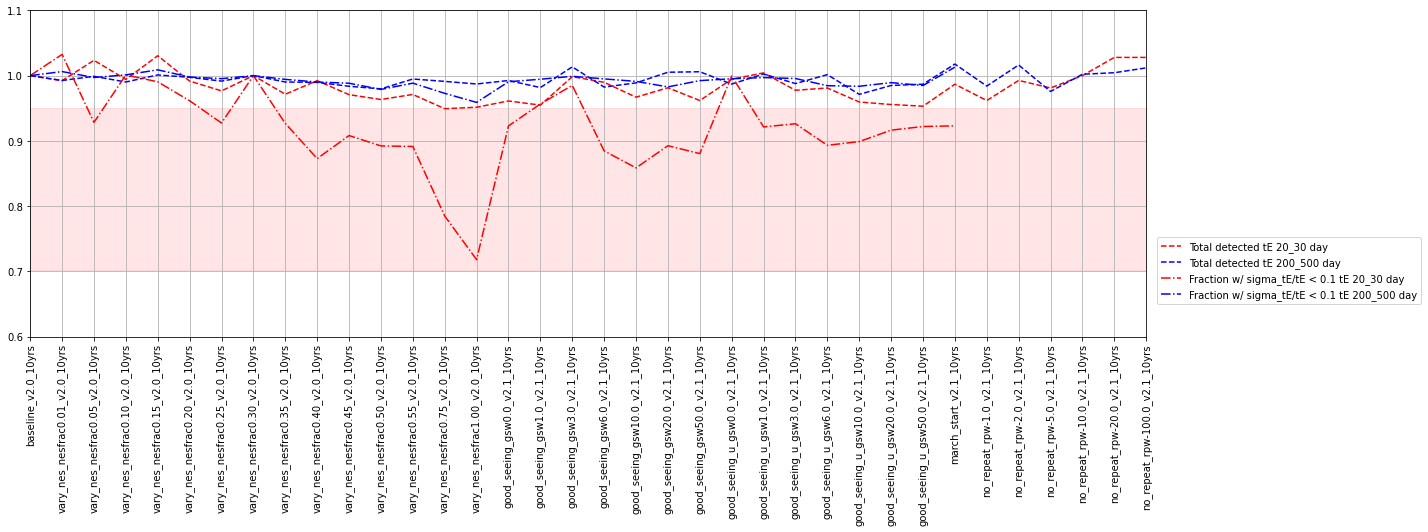

In [12]:
fams = ['vary nes', 'good seeing', 'technical', 'suppress repeats']
these_runs = families.explode('run').loc[fams]['run']
these_runs = np.concatenate([['baseline_v2.0_10yrs'],these_runs])

these_runs = np.concatenate([[baseline_run], families.explode('run').loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mall['metric']], 
                              baseline_run=baseline_run,
                              metric_set=mall)
fig.set_figwidth(20)


fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                              metric_label_map=msub['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(20)
ax.legend(loc=(1.01, 0.1))
ax.set_ylim(0.6, 1.1)

A series of other families. Taking too many visits from the general WFD (for the vary_nes with large fractions) results in poor microlensing results. Some of the good seeing runs also do worse; perhaps due to shifting of the timing of visits for 'good seeing' time periods? 
Suppressing repeats may have a positive impact. 

(0.6, 1.1)

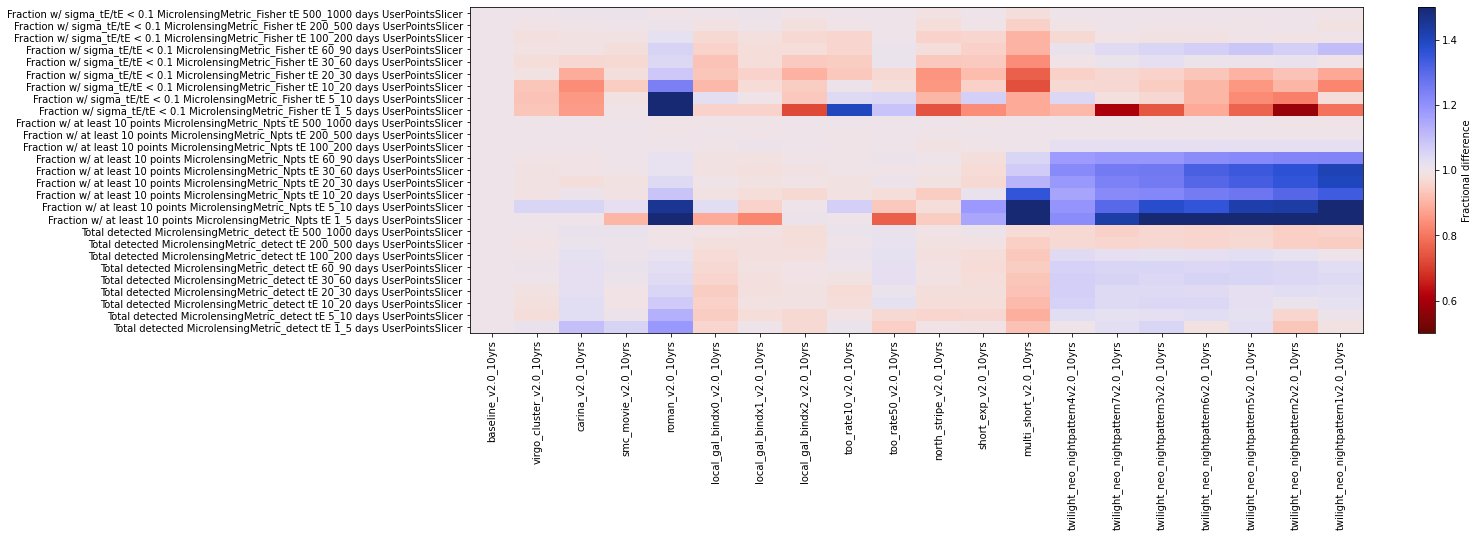

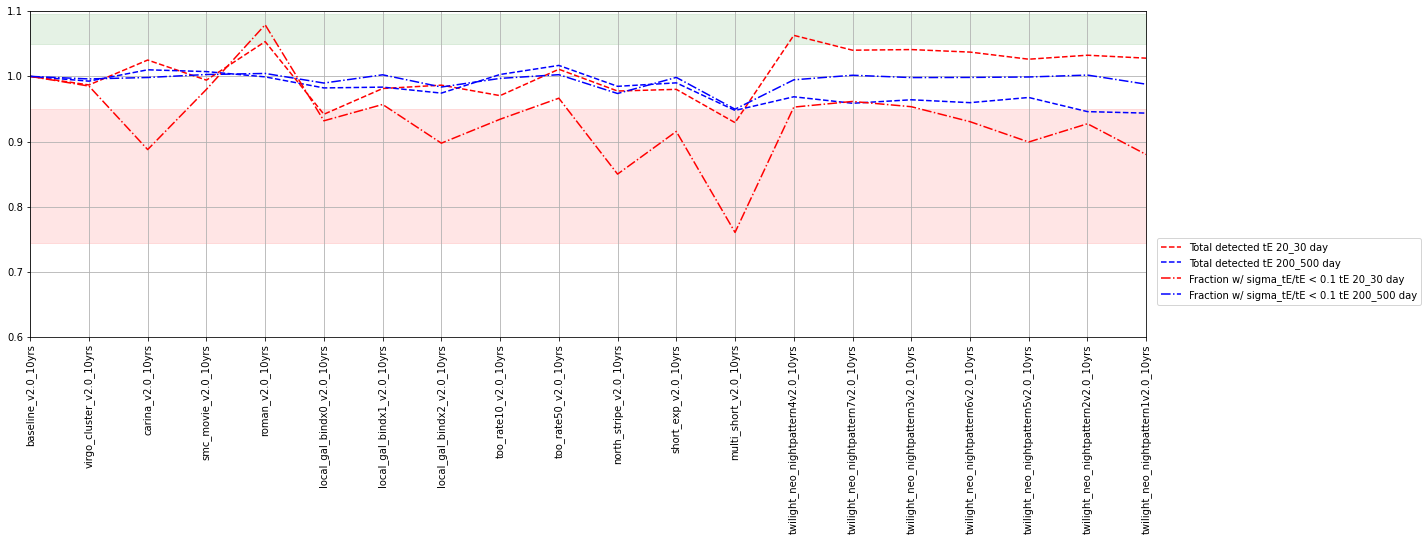

In [13]:
fams = ['microsurveys']
these_runs = np.concatenate([[baseline_run], families.explode('run').loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mall['metric']], 
                              baseline_run=baseline_run,
                              metric_set=mall)
fig.set_figwidth(20)


fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                              metric_label_map=msub['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(20)
ax.legend(loc=(1.01, 0.1))
ax.set_ylim(0.6, 1.1)

The twilight NEO survey contributes more visits for bright microlenses, which appears to improve the metric results. 
The Roman field adds important visits for microlensing. 

In [14]:
family_list

array(['baseline', 'rolling', 'triplets', 'long gaps no pairs',
       'bluer balance', 'longer u visits', 'vary nes', 'vary gp',
       'galactic plane footprint', 'vary expt', 'good seeing',
       'microsurveys', 'twilight neo 15s', 'technical',
       'suppress repeats', 'ddf percent', 'ddf euclid moved',
       'ddf season length', 'ddf double', 'ddf quad',
       'ddf quad subfilter', 'ddf bright', 'ddf dither', 'ddf roll',
       'ddf accordian', 'ddf old rot', 'ddf deep universal',
       'ddf deep rolling', 'ddf early deep'], dtype=object)

(0.8, 1.1)

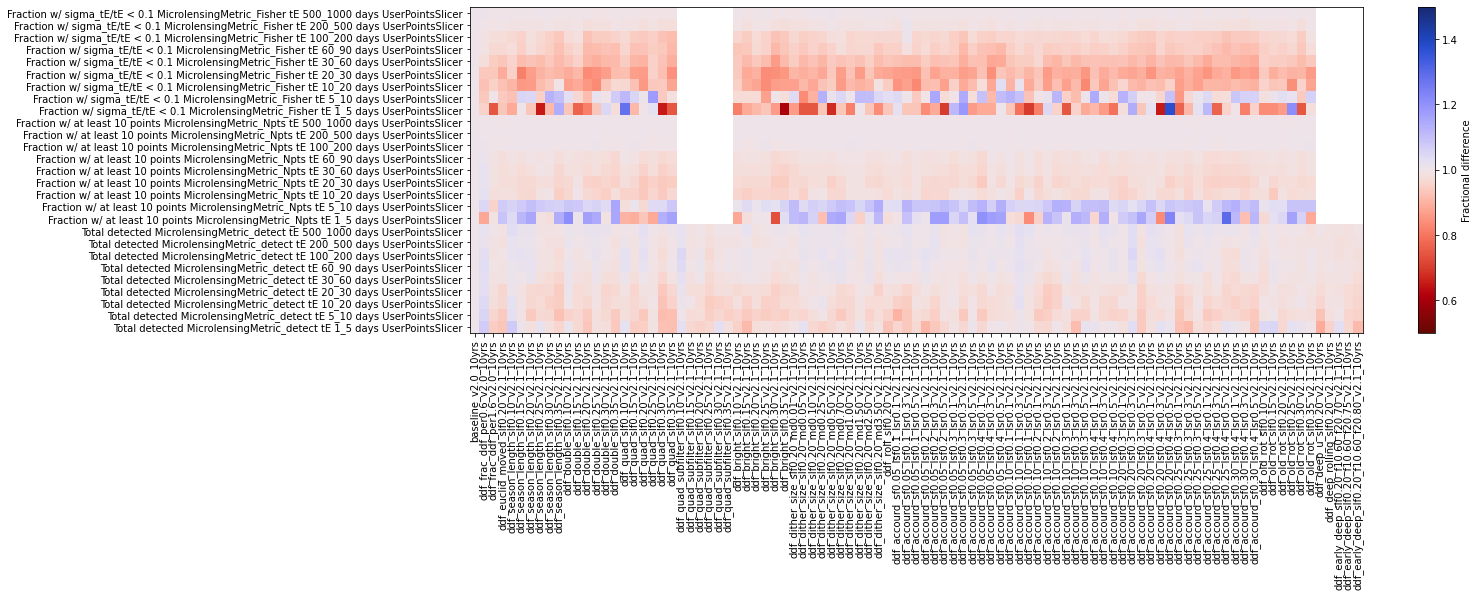

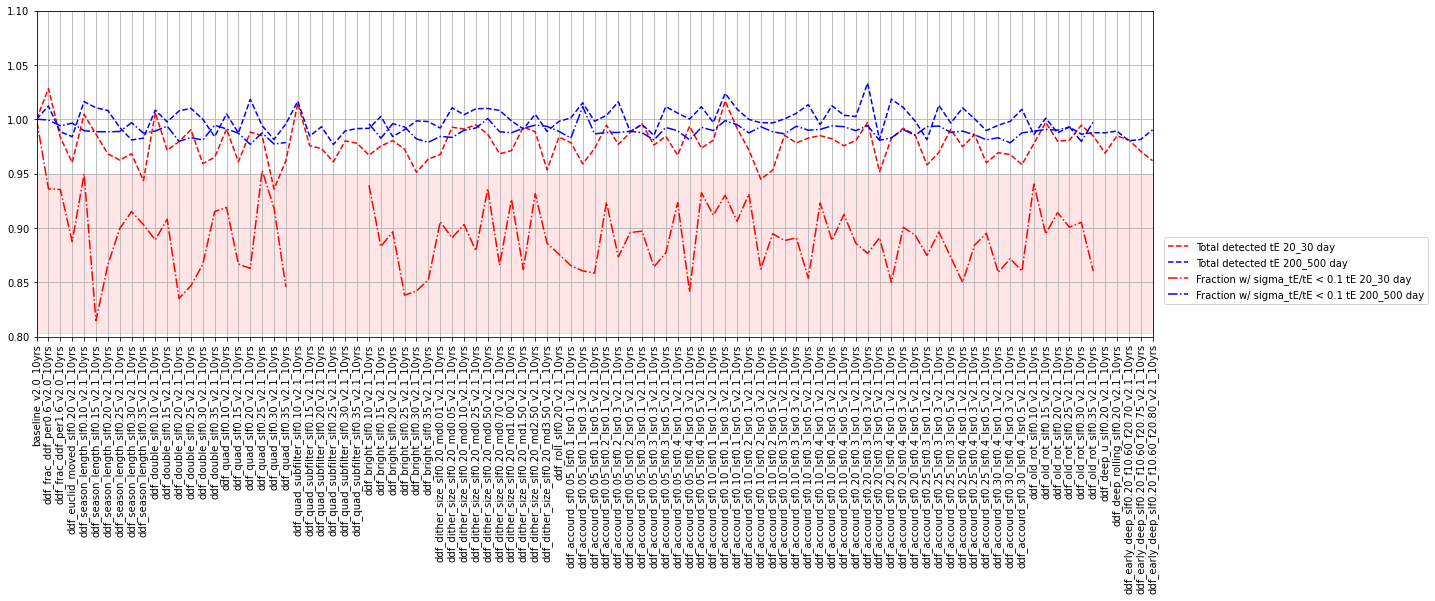

In [15]:
fams = [f for f in family_list if f.startswith('ddf')]
these_runs = np.concatenate([[baseline_run], families.explode('run').loc[fams]['run']])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, mall['metric']], 
                              baseline_run=baseline_run,
                              metric_set=mall)
fig.set_figwidth(20)


fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']],
                             baseline_run=baseline_run,
                             metric_set=msub,
                              metric_label_map=msub['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(20)
ax.legend(loc=(1.01, 0.1))
ax.set_ylim(0.8, 1.1)

Adding pre-scheduled DDF visits is generally similar across all of the pre-scheduled runs, and slightly negative for 20-30 day lensing events. This may be tied to variation in the u and z band scheduling and how they are shifted around the lunar cycle. 